In [1]:
import torch
import yaml
import numpy as np
import matplotlib.pyplot as plt
from models.vanilla_vae import *
from models.vanilla_vae_fashionMnist import *
from models.vanilla_vae_CelebA import *
from models.vanilla_vae_anime_faces import *

c:\Users\60551\anaconda3\envs\mlvision\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open(f"./config/celeba.yaml", 'r') as file:
    try:
        config = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)

if torch.has_cuda:
    device = 'cuda'
else:
    device = 'cpu'

model1 = CelebA_VAE(**config)
model1.load_state_dict(torch.load("./ckpts/celeba.ckpt"))
model1.to(device);

model2 = VanillaVAE_Anime(**config)
model2.load_state_dict(torch.load("./ckpts/anime.ckpt"))
model2.to(device);

In [3]:
plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = torchvision.transforms.functional.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [5]:
model1.eval()
model2.eval()
image_size=64

testset1 = torchvision.datasets.CelebA(root='./datasets/CelebA/', split="test", transform=transforms.ToTensor())
testset2 = torchvision.datasets.ImageFolder(root="./datasets/anime_faces/",
                                                        transform=transforms.Compose([
                                                            transforms.Resize(
                                                                image_size),
                                                            transforms.CenterCrop(
                                                                image_size),
                                                            transforms.ToTensor(),
                                                        ]))

In [6]:
def human_to_anime():
    testloader1 = torch.utils.data.DataLoader(testset1, batch_size=10,
                                         shuffle=False, num_workers=2)
    with torch.no_grad():
        for batch_idx, (x, _) in enumerate(testloader1):
            x = x.to('cuda')
            
            mu, log_var = model1.encode(x)
            z = model1.reparameterize(mu, log_var)

            x_hat = model2.decode(z)
            x_orig = x
            break
    show(list(x_hat))
    show(list(x_orig))
    pass

def anime_to_human():
    testloader2 = torch.utils.data.DataLoader(testset2, batch_size=10,
                                         shuffle=False, num_workers=2)
    with torch.no_grad():
        for batch_idx, (x, _) in enumerate(testloader2):
            x = x.to('cuda')
            
            mu, log_var = model2.encode(x)
            z = model2.reparameterize(mu, log_var)

            x_hat = model1.decode(z)
            x_orig = x
            break
    show(list(x_hat))
    show(list(x_orig))
    pass

In [7]:
def show_comparison(testset, model):
    testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=False, num_workers=2)
    with torch.no_grad():
        for batch_idx, (x, _) in enumerate(testloader):
            x = x.to('cuda')
            
            x_hat = model.forward(x)[0]
            x_orig = x
            break
    show(list(x_hat))
    show(list(x_orig))
    pass

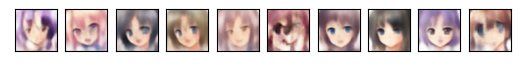

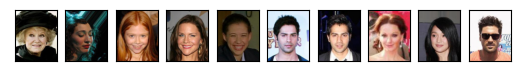

In [8]:
human_to_anime()

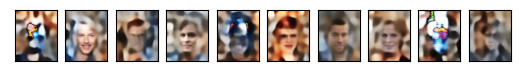

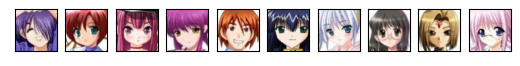

In [9]:
anime_to_human()

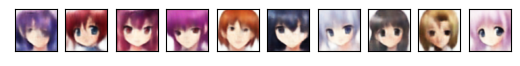

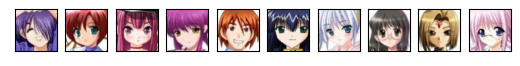

In [10]:
show_comparison(testset2, model2)

In [ ]:
show_comparison(testset1, model1)